In [ ]:
# importing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

****
# Reading and Displaying the Data #
****

In [ ]:
# Reading training data
tr=pd.read_csv(r'/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
# Reading testing data
te=pd.read_csv(r'/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

In [ ]:
tr

In [ ]:
te

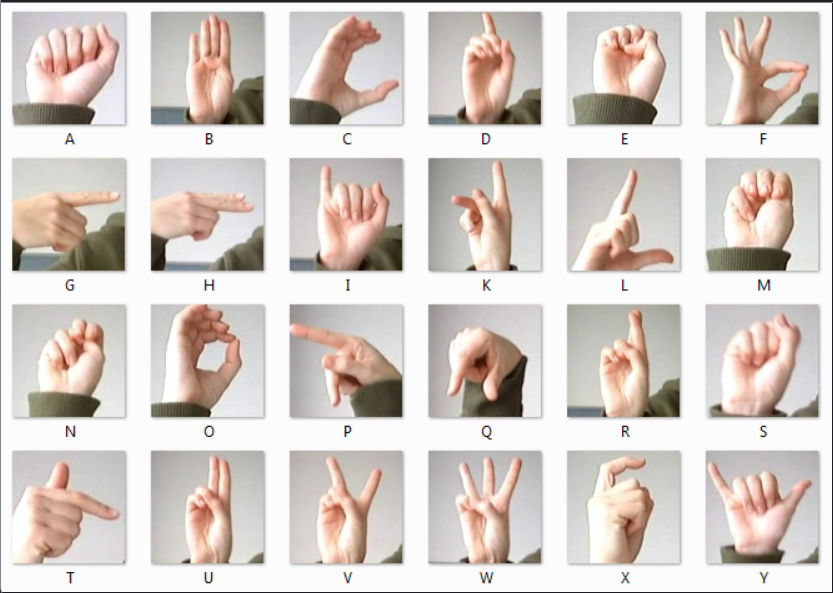


**Same is avaialble in the dataset description**

****
# Data Preprocessing #
****

In [ ]:
print(tr.shape,te.shape)

In [ ]:
# Splitting the datasets into Features (Pixels) and Target Variables

tr_x=tr.iloc[:,1:]
tr_y=tr.iloc[:,:1]
te_x=te.iloc[:,1:]
te_y=te.iloc[:,:1]
print(tr_x.shape,tr_y.shape,te_x.shape,te_y.shape)

In [ ]:
# Each picture or data input is a 28 X 28 Grayscale matrix
# We need to convert the input to that

tr_x=tr_x.to_numpy().reshape(-1,28,28)  # Converting to 1D then reshaping
te_x=te_x.to_numpy().reshape(-1,28,28)  # Converting to 1D then reshaping
print(tr_x.shape,te_x.shape)

In [ ]:
# For our target variable we will one hot encode it
# tr_y and te_y are in the shape of (n,1), we need to convert this to (n,) for pd.get_dummies to work.
# Therefore we use squeeze function

tr_y=pd.get_dummies(tr_y.squeeze())
te_y=pd.get_dummies(te_y.squeeze())
print(tr_y.shape,te_y.shape)

In [ ]:
# Final shapes of inputs and target variables for training and testing datasets

print("Training: ",tr_x.shape,tr_y.shape)
print("Testing: ",te_x.shape,te_y.shape)

****
# Data Preparation #
****

In [ ]:
# importing
from sklearn.model_selection import train_test_split

In [ ]:
trx,valx,tra_y,valy=train_test_split(tr_x,tr_y,test_size=0.15,random_state=20)

****
# Convulational Neural Network #
****

In [ ]:
# importing 

import keras as k
from keras import models,layers
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [ ]:
mod=models.Sequential()

# CNN Layer 1

mod.add(layers.Conv2D(64,(3,3),input_shape=(28,28,1),padding='same'))
mod.add(layers.BatchNormalization())
mod.add(layers.Activation('relu'))

# CNN Layer 2

mod.add(layers.Conv2D(128,(3,3),padding='same'))
mod.add(layers.BatchNormalization())
mod.add(layers.Activation('relu'))

# CNN Later 3
mod.add(layers.Conv2D(256,(3,3),padding='same'))
mod.add(layers.BatchNormalization())
mod.add(layers.Activation('relu'))
mod.add(layers.MaxPooling2D())
mod.add(layers.Dropout(0.2))

# CNN Layer 4

mod.add(layers.Conv2D(50,(3,3),padding='same'))
mod.add(layers.BatchNormalization())
mod.add(layers.Activation('relu'))
mod.add(layers.MaxPooling2D())
mod.add(layers.Dropout(0.2))

# CNN Layer 5

mod.add(layers.Conv2D(25,(3,3),padding='same'))
mod.add(layers.BatchNormalization())
mod.add(layers.Activation('relu'))
mod.add(layers.Dropout(0.1))

# Flattening

mod.add(layers.Flatten())

# Fully Connected layer 1
mod.add(layers.Dense(1024,activation='relu'))
mod.add(layers.BatchNormalization())

# Fully Connected layer 2

mod.add(layers.Dense(512,activation='relu'))
mod.add(layers.BatchNormalization())

# Fully Connected layer 3

mod.add(layers.Dense(256,activation='relu'))
mod.add(layers.BatchNormalization())

# Fully Connected layer 4

mod.add(layers.Dense(64,activation='relu'))
mod.add(layers.BatchNormalization())
mod.add(layers.Dropout(0.2))

# Output Layer

mod.add(layers.Dense(24,activation='softmax'))


In [ ]:
opt=k.optimizers.Adam(learning_rate=0.005)
mod.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
mod.summary()

In [ ]:
lr=ReduceLROnPlateau(monitor='val_accuracy',factor=0.05,patience=5)
es=EarlyStopping(monitor='val_accuracy',patience=8,restore_best_weights=True)

In [ ]:
modh=mod.fit(trx,tra_y,batch_size=128,epochs=20,validation_data=(valx,valy),callbacks=[lr,es])

In [ ]:
pred=mod.predict(te_x)

In [ ]:
te_y=np.argmax(te_y,axis=1)
pred=np.argmax(pred,axis=1)

****
# Evaluation Metrics #
****

In [ ]:
# importing

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [ ]:
print('Accuracy: ',accuracy_score(te_y,pred),'\n')
print('Precision: ',precision_score(te_y,pred,average='micro'),'\n')
print('Recall: ',recall_score(te_y,pred,average='micro'),'\n')
print('F1 Score: ',f1_score(te_y,pred,average='micro'),'\n')

In [ ]:
print('Classification Report:\n\n',classification_report(te_y,pred))

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(te_y,pred),annot=True,fmt='d')

****
# Feedback and Suggestions #
****

**Kindly provide suggestions and feedback to improve the above CNN**

**Kindly Upvote if you found this Helpful or if you liked it**